## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [86]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Подготавливаем общие настройки для графиков

sns.set(
    rc={
        "figure.figsize": (12, 8), #размер графика - 12 дюймов в ширину, 8 в длину
        "axes.titlesize": 20, #размер заголовка 
        "axes.labelsize": 14, #размер подписей осей
        "xtick.labelsize": 13, #размер подписей чёрточек на x-оси
        "ytick.labelsize": 13, #размер подписей чёрточек на y-оси
    }
)

sns.set_style("whitegrid") #тема фона, белая со штриховкой

df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [87]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [88]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Проверим значения нашего дата сета на уникальность**

In [89]:
for column in list(df):
    print('-----------')
    print(column)
    print('-----------')
    print(df[column].unique())

-----------
children
-----------
[ 1  0  3  2 -1  4 20  5]
-----------
days_employed
-----------
[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]
-----------
dob_years
-----------
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
-----------
education
-----------
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
-----------
education_id
-----------
[0 1 2 3 4]
-----------
family_status
-----------
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
-----------
family_status_id
-----------
[0 1 2 3 4]
-----------
gender
-----------
['F' 'M' 'XNA']
-----------
income_type
-----------
['сотрудник' 'пенсионер' 'комп

### Выводы
**В данныйх заметны некоторые странности, накидаем список:**
- [x] В стролбце дети есть минусовые дети, а одно из значений подозрительно велико. Надо исследовать сколько таких значения;
- [x] в days_employed видно, что есть пропуски + значения минусовые;
- [x] dob_years есть нулевые значения в данных о возрасте;
- [x] education нужно привечти все данные в нижний регистр, колличество уников должно совпадать с кол-вом education_id;
- [x] family_status привести в нижний регистр;
- [x] total_income похоже, что есть пропуски и минусовые значения;
- [x] purpose надо выделить категории, сейчас все в одну кучу
- [x] total_income надо выделить категории, будет полезно для ответа на вопрос по зависимости

### Шаг 2. Предобработка данных
### Обработка дубликатов
**Приведем данные к нижнему регистру**

In [90]:
df['education'] = df['education'].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [91]:
df['family_status'] = df['family_status'].str.lower()
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

**Исследуем столбец с информацией о детях**

In [92]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

**Поправим 2 ошибки в данных**
- 20 детей это большая редкость. Скорее всего это ошибка данных. Заменим средним по выборке
- (-1) не бывает, поправим

In [93]:
df.loc[df['children'] == -1, 'children'] = 1

In [94]:
round(df[df['children'] <=5]['children'].mean(), 3)

0.474

In [95]:
df.loc[df['children'] == 20, 'children'] = 2

In [96]:
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

**Исследуем возраст заемщиков**

In [97]:
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

<AxesSubplot:>

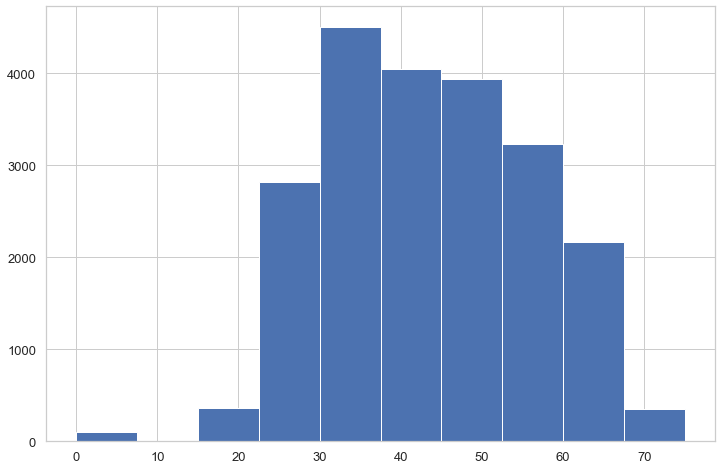

In [98]:
df['dob_years'].hist()

101 значение c нулевым возрастом, похоже на ошибку выгрузки.   
Странно, если в банке выдают кредит не понимая сколько человеку лет

In [99]:
print('Средний возраст заемщика: {:.0f}'.format(df['dob_years'].mean()))

Средний возраст заемщика: 43


In [100]:
df.loc[df['dob_years'] == 0, 'dob_years'] = 43

<AxesSubplot:>

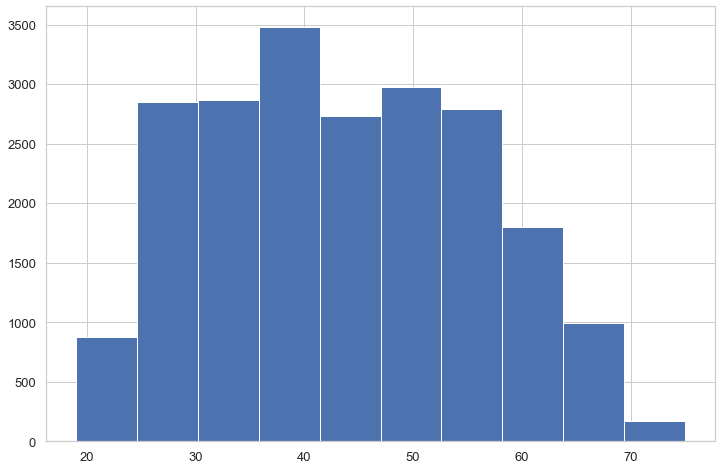

In [101]:
df['dob_years'].hist()

### Обработка пропусков

In [102]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [103]:
df[df['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [104]:
total_data = len(df)
nan_data = 2174
print('Процент прпущеных значение от общей выборки: {:.0%}'.format(nan_data/total_data))

Процент прпущеных значение от общей выборки: 10%


Можно убрать значения, но кажется что 10% достаточно много.  
Лучше заполнить средним по группе. Сгруппируем по типу работы и и каждому классу присвоим свои средние.

In [105]:
# Меняем NaN на нули
df = df.fillna(0)
df[df['days_employed'] == 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,0.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,0.0,сыграть свадьбу
26,0,0.0,41,среднее,1,женат / замужем,0,M,госслужащий,0,0.0,образование
29,0,0.0,63,среднее,1,не женат / не замужем,4,F,пенсионер,0,0.0,строительство жилой недвижимости
41,0,0.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,0.0,сделка с подержанным автомобилем
55,0,0.0,54,среднее,1,гражданский брак,1,F,пенсионер,1,0.0,сыграть свадьбу


**Работа со столбцом total_income**

<AxesSubplot:>

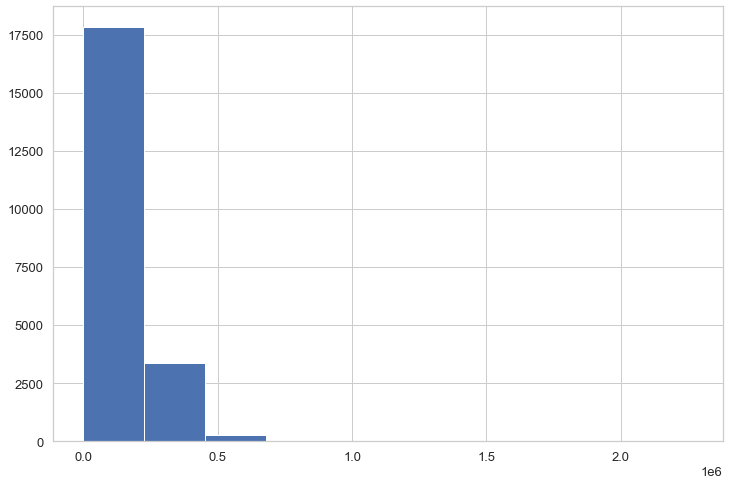

In [106]:
df['total_income'].hist()

In [107]:
total_income_mean = round(df.groupby('income_type').agg({'total_income': 'median'}))
total_income_mean

,total_income
income_type,
безработный,131340.0
в декрете,53829.0
госслужащий,139034.0
компаньон,162401.0
пенсионер,110180.0
предприниматель,249582.0
сотрудник,133546.0
студент,98202.0


In [108]:
total_income_mean.loc['безработный', 'total_income']

131340.0

In [109]:
def distribute_salaries_by_groups(row):
    '''
    Функция проверяет значение столбца total_income, елси в нем 0,
    заменяет средним по группе типа занятости клиента банка.
    '''
    income_type = row['income_type']
    total_income = row['total_income']
    if total_income == 0:
        if income_type == 'безработный':
            return total_income_mean.loc['безработный', 'total_income']
    if total_income == 0:
        if income_type == 'в декрете':
            return total_income_mean.loc['в декрете', 'total_income']
    if total_income == 0:
        if income_type == 'госслужащий':
            return total_income_mean.loc['госслужащий', 'total_income']
    if total_income == 0:
        if income_type == 'компаньон':
            return total_income_mean.loc['компаньон', 'total_income']
    if total_income == 0:
        if income_type == 'пенсионер':
            return total_income_mean.loc['пенсионер', 'total_income']
    if total_income == 0:
        if income_type == 'предприниматель':
            return total_income_mean.loc['предприниматель', 'total_income']
    if total_income == 0:
        if income_type == 'сотрудник':
            return total_income_mean.loc['сотрудник', 'total_income']  
    if total_income == 0:
        if income_type == 'студент':
            return total_income_mean.loc['студент', 'total_income']     
    return total_income

In [110]:
# Проверяем функцию
row_values = [54321, 'компаньон']
row_columns = ['total_income', 'income_type']
row = pd.Series(data=row_values, index=row_columns)  
print(distribute_salaries_by_groups(row))

54321


In [111]:
# Замена значений столбца по функции. Применяем к дата фрейму, т.к в функции есть условия по значению из другого столбца.
# По умолчанию Pandas передаёт в функцию distribute_salaries_by_groups() столбец. Чтобы на вход в функцию отправлялись строки, нужно указать параметр axis = 1 метода apply().
df['total_income'] = df.apply(distribute_salaries_by_groups, axis=1)

In [112]:
df[df['days_employed'] == 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,0.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,110180.0,сыграть свадьбу
26,0,0.0,41,среднее,1,женат / замужем,0,M,госслужащий,0,139034.0,образование
29,0,0.0,63,среднее,1,не женат / не замужем,4,F,пенсионер,0,110180.0,строительство жилой недвижимости
41,0,0.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,139034.0,сделка с подержанным автомобилем
55,0,0.0,54,среднее,1,гражданский брак,1,F,пенсионер,1,110180.0,сыграть свадьбу


<AxesSubplot:>

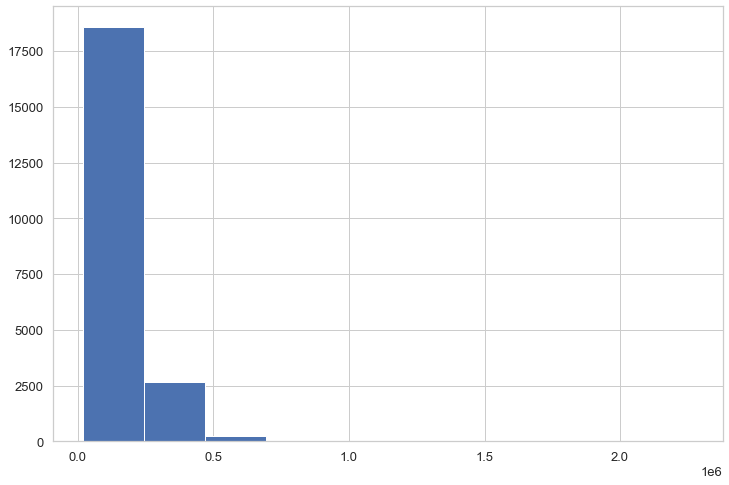

In [113]:
# Проверяем как изменилось респределение данных относительно 0
df['total_income'].hist()

**Замена типа данных**

In [114]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Мы изменили значение колонок days_employed, total_income.  
В рамках исследования нам вещественные значения в этих переменных не нужны.  
Портят вид и вводят в заблуждения

**Минусовые значения в столбце days_employed**
- Возможные причины появления
    - Ошибка при выгрузке данных
    - Возможно критичная и данные не верны  
Напишем функцию которая преобразует наши значения

In [115]:
import math
def conversion_to_positive_values(row):
    '''
    Функция избавляется от отрицательного значения. Как алтернативу можно использовать встроенную функцию abc()
    Она берет число по модулю
    '''    
    if row < 0:
        values = round(float(math.sqrt(row**2)))
        return values
    else: return round(row)

Проверяем функцию

In [116]:
print(conversion_to_positive_values(-8437.673028))

8438


In [117]:
print(conversion_to_positive_values(8437.673028))

8438


In [118]:
print(conversion_to_positive_values(0.0))

0


In [119]:
df['days_employed'] = df['days_employed'].apply(conversion_to_positive_values)
df['total_income'] = df['total_income'].apply(conversion_to_positive_values)

In [120]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Исследуем числовые значения где были пропуски

<AxesSubplot:>

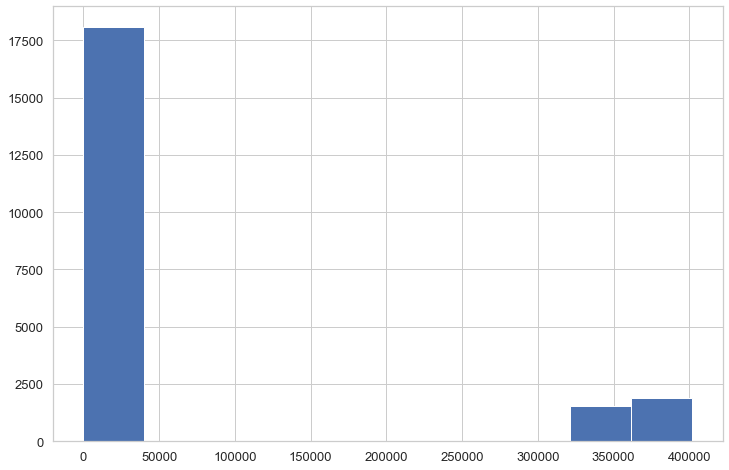

In [121]:
df['days_employed'].hist()

In [122]:
df['days_employed'].median()

1808.0

<AxesSubplot:>

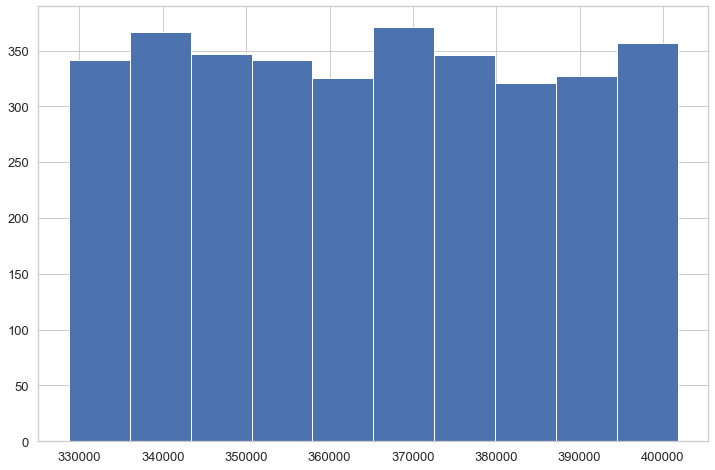

In [123]:
df[df['days_employed'] > 20000 ]['days_employed'].hist()

In [124]:
df[df['days_employed'] > 20000 ]['days_employed'].mean() / 365

1000.010436407738

В данных есть очень большие значения рабочего стажа. Люди работают 1000 лет.  
Особо не важно склько им лет, так просто не может быть.  
Похоже на ошибку, найдем границу и заменим средним.

<AxesSubplot:>

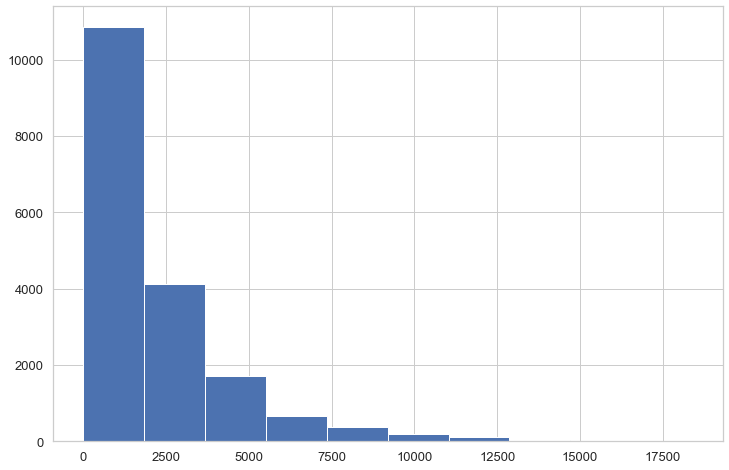

In [125]:
df[df['days_employed'] < 20000 ]['days_employed'].hist()

In [126]:
norml_employed = df[(df['days_employed'] < 20000) & (df['days_employed'] > 0)]['days_employed'].count()
print(norml_employed)

15906


In [127]:
anomaly_employed = df[df['days_employed'] > 20000 ]['days_employed'].count()
print(anomaly_employed)

3445


In [128]:
print('Процент анамальных значений стажа: {:.0%}'.format(anomaly_employed/norml_employed))

Процент анамальных значений стажа: 22%


Много, но кроме как заменить средним, варианта нет. В реальной жизни обратился бы к тому кто выгружал данные

In [129]:
mean_employed = round(df[(df['days_employed'] < 20000) & (df['days_employed'] > 0)]['days_employed'].mean())
print(mean_employed)

2353


In [130]:
df.loc[df['days_employed'] > 20000, 'days_employed'] = int(mean_employed)

<AxesSubplot:>

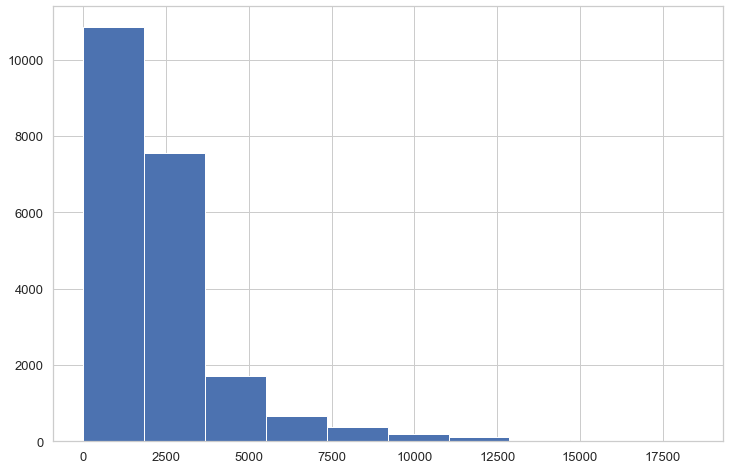

In [131]:
df['days_employed'].hist()

Раз мы нашли среднее заполним нули, которые остались с предыдущего этапа обработки. И проверим еще раз по гистограме.

In [132]:
df.loc[df['days_employed'] == 0, 'days_employed'] = int(mean_employed)

In [133]:
df[df['days_employed'] == 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


### Лемматизация

Подробно изучим цели заемщиков

In [134]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [135]:
from pymystem3 import Mystem
m = Mystem()

Лематизируем и изучим леммы

In [136]:
for text in df['purpose'].unique():
    lemmas = m.lemmatize(text)
    print(lemmas)

['покупка', ' ', 'жилье', '\n']
['приобретение', ' ', 'автомобиль', '\n']
['дополнительный', ' ', 'образование', '\n']
['сыграть', ' ', 'свадьба', '\n']
['операция', ' ', 'с', ' ', 'жилье', '\n']
['образование', '\n']
['на', ' ', 'проведение', ' ', 'свадьба', '\n']
['покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', '\n']
['покупка', ' ', 'недвижимость', '\n']
['покупка', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['покупка', ' ', 'жилой', ' ', 'недвижимость', '\n']
['строительство', ' ', 'собственный', ' ', 'недвижимость', '\n']
['недвижимость', '\n']
['строительство', ' ', 'недвижимость', '\n']
['на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', '\n']
['на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', '\n']
['операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['строительство', ' ', 'жилой', ' ', 'недвижимость', '\n']
['жилье', '\n']
['операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', '\n']
['автомобиль', '\n']
['заниматься', ' ', 'образование'

Выделим основные таргеты по целям клиентов банка  
Глобально получилось 4 таргета   
- свадьба
- недвижимость
- автомобиль
- образование

Есть другой способ, но я до него пока не додумался

In [137]:
#df['lemmas'] = df['purpose'].apply(m.lemmatize)
#df['lemmas']

### Категоризация данных  
Напишем функцию для категоризации целей кредита заемщиков

In [138]:
def goals_сategorizing (row):
        lemmas = m.lemmatize(row)
        if 'свадьба' in lemmas:
            return 'свадьба'
        if ('жилье' in lemmas)or('недвижимость' in lemmas):
            return 'недвижимость'
        if 'автомобиль' in lemmas:
            return 'автомобиль'
        if 'образование' in lemmas:
            return 'образование'
        return 'вне группы'

Проверка функции

In [139]:
print(goals_сategorizing('на проведение свадьбы'))

свадьба


In [140]:
print(goals_сategorizing('покупка своего жилья'))

недвижимость


In [141]:
print(goals_сategorizing('строительство жилой недвижимости'))

недвижимость


Сделаем новый столбец и запишем туда категории которые мы выделили в лемме

In [142]:
df['target_category'] = df['purpose'].apply(goals_сategorizing)

Проверим как сработало

In [143]:
df['target_category'].value_counts()

недвижимость    10840
автомобиль       4315
образование      4022
свадьба          2348
Name: target_category, dtype: int64

Видим что функция работает верно, переходим к категоризации доходов заемщиков. Это понадобится для поиска зависимости.  
Посмотрим на данные в этой переменной.

<AxesSubplot:>

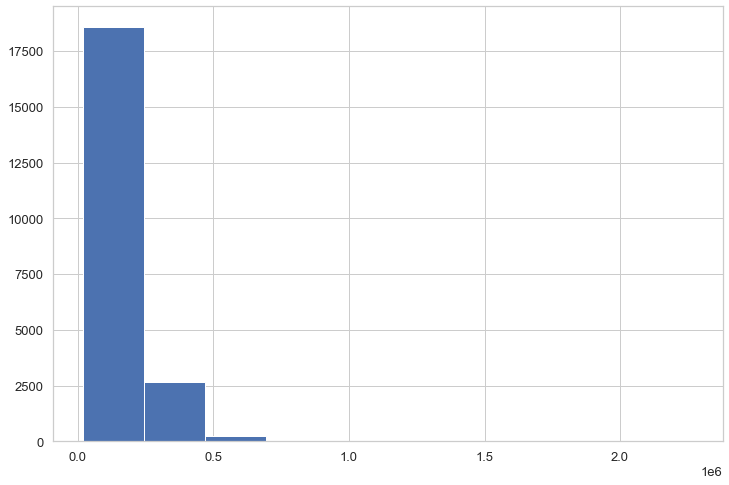

In [144]:
df['total_income'].hist()

In [145]:
df['total_income'].min()

20667

In [146]:
df['total_income'].max()

2265604

In [147]:
df['total_income'].median()

139898.0

Принцип группировки и значеня взял из нескольких исследований, которые нашел в интернете. Во всех была разная категоризация, привел к усредненному

In [148]:
def income_сategorizing(row):
        if (row > 20000) & (row < 50000):
            return 'низкий'
        if (row >= 50000) & (row < 150000):
            return 'средний'
        if (row >= 150000) & (row < 300000):
            return 'богатый средний'
        if (row >= 300000) & (row < 500000):
            return 'богатый'
        if (row >= 500000) & (row < 3000000):
            return 'очень богатый'
        return 'вне группы'

Проверим функцию

In [149]:
print(income_сategorizing(124999))
print(income_сategorizing(768))
print(income_сategorizing(777889))

средний
вне группы
очень богатый


In [150]:
df['income_сategory'] = df['total_income'].apply(income_сategorizing)

In [151]:
df['income_сategory'].value_counts()

средний            11460
богатый средний     8211
богатый             1260
низкий               372
очень богатый        222
Name: income_сategory, dtype: int64

Чтобы проверить насколько хорошо я сделал работу воспользуюсь другим решением, которым поделился ревьюер. Спасибо ему!

In [152]:
df['sq_grs'] = pd.qcut(df['total_income'],5)

In [153]:
df['sq_grs'].value_counts()

(20666.999, 98661.6]     4305
(98661.6, 132141.8]      4305
(132141.8, 161151.2]     4305
(161151.2, 214269.6]     4305
(214269.6, 2265604.0]    4305
Name: sq_grs, dtype: int64

В чем то я был прав, но данный метод внушает большее доверия, перепишем все заново и добавим новые категории по доходу 

In [154]:
def qcut_income_сategorizing(row):
        if (row > 20000) & (row < 98662):
            return 'низкий'
        if (row >= 98662) & (row < 135668):
            return 'средний'
        if (row >= 135668) & (row < 156178):
            return 'богатый средний'
        if (row >= 156178) & (row < 214253):
            return 'богатый'
        if (row >= 214253) & (row < 2265605):
            return 'очень богатый'
        return 'вне группы'

In [155]:
df['qcut_income_сategory'] = df['total_income'].apply(qcut_income_сategorizing)

In [156]:
df['qcut_income_сategory'].value_counts()

средний            5823
богатый            4813
очень богатый      4306
низкий             4305
богатый средний    2278
Name: qcut_income_сategory, dtype: int64

Все сходится

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?


In [157]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,target_category,income_сategory,sq_grs,qcut_income_сategory
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,богатый средний,"(214269.6, 2265604.0]",очень богатый
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,средний,"(98661.6, 132141.8]",средний
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,средний,"(132141.8, 161151.2]",богатый средний
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,богатый средний,"(214269.6, 2265604.0]",очень богатый
4,0,2353,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,богатый средний,"(132141.8, 161151.2]",богатый


In [158]:
addiction_children = df.groupby(['children', 'debt']).agg({'debt': 'count'})
addiction_children

debt
children debt       
0        0     13086
         1      1063
1        0      4420
         1       445
2        0      1929
         1       202
3        0       303
         1        27
4        0        37
         1         4
5        0         9

In [159]:
for children in range(6):
    try:
        print('Детей у заемщика:', children)
        x = (int(addiction_children.loc[children,0])) 
        y = (int(addiction_children.loc[children,1]))
        print('Процент невозвратов в срок: {:.0%}'.format(y/x))
    except:
        print('Платили в срок:', x)
        print('Просрочили платеж: Нет данных')

Детей у заемщика: 0
Процент невозвратов в срок: 8%
Детей у заемщика: 1
Процент невозвратов в срок: 10%
Детей у заемщика: 2
Процент невозвратов в срок: 10%
Детей у заемщика: 3
Процент невозвратов в срок: 9%
Детей у заемщика: 4
Процент невозвратов в срок: 11%
Детей у заемщика: 5
Платили в срок: 9
Просрочили платеж: Нет данных


Не самое лучшее решение задачи. Нормальное решение я нашел в слаке)

In [160]:
children = df.groupby('children').agg({'purpose': 'count', 'debt': 'mean'})
children['percent'] = round(children['debt']*100)
children.sort_values('percent', ascending = False)

,purpose,debt,percent
children,,,
4,41,0.097561,10.0
1,4865,0.091470,9.0
2,2131,0.094791,9.0
0,14149,0.075129,8.0
3,330,0.081818,8.0
5,9,0.000000,0.0


### Вывод
По исследованию видно, что процент просрочки растет от кол-ва детей. С оговорками можно сказать, что все же закономерность есть. Надо заметить, что выборки по группе очень разные и кол-во многодетных заемщиков уменьшается с кол-вом детей. Бездетная группа может показывать лучший результат из-за работы больших чисел. Банку я бы порекомендовал взять в скоринг этот фактор, но с небольшим весом в контексте рашения по скорингу.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [161]:
family = df.groupby('family_status').agg({'purpose': 'count', 'debt': 'mean'})
family['percent'] = round(family['debt']*100)
family.sort_values('percent', ascending = False)

,purpose,debt,percent
family_status,,,
не женат / не замужем,2813,0.097405,10.0
гражданский брак,4177,0.092890,9.0
женат / замужем,12380,0.075202,8.0
в разводе,1195,0.071130,7.0
вдовец / вдова,960,0.065625,7.0


### Вывод
Одинокие люди более обязательные к выплатам

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [162]:
income = df.groupby('income_сategory').agg({'purpose': 'count', 'debt': 'mean'})
income['percent'] = round(income['debt']*100)
income.sort_values('percent', ascending = False)

,purpose,debt,percent
income_сategory,,,
богатый средний,8211,0.079162,8.0
средний,11460,0.083944,8.0
богатый,1260,0.073016,7.0
низкий,372,0.061828,6.0
очень богатый,222,0.063063,6.0


Для интереса вывел первый способ категоризации. Но понял, что это путает вывыды. Буду делать вывод на основе более точного с точки зрения математики исследования.

In [163]:
qcut_income = df.groupby('qcut_income_сategory').agg({'purpose': 'count', 'debt': 'mean'})
qcut_income['percent'] = round(qcut_income['debt']*100)
qcut_income.sort_values('percent', ascending = False)

,purpose,debt,percent
qcut_income_сategory,,,
богатый средний,2278,0.088235,9.0
богатый,4813,0.083524,8.0
низкий,4305,0.080139,8.0
средний,5823,0.084149,8.0
очень богатый,4306,0.070367,7.0


### Вывод
Поразительно, категория богатых с доходом 150000 - 200000 хуже всего справляется с отсутствием просрочки, зона риска. Но в целом все группы в относительно равных значениях. Явной закономерности я не вижу.

- Как разные цели кредита влияют на его возврат в срок?

In [164]:
target = df.groupby('target_category').agg({'purpose': 'count' ,'debt': 'mean'})
target['percent'] = round(target['debt']*100)
target.sort_values('percent', ascending = False)

,purpose,debt,percent
target_category,,,
автомобиль,4315,0.093395,9.0
образование,4022,0.091994,9.0
свадьба,2348,0.079216,8.0
недвижимость,10840,0.072140,7.0


### Вывод

Худшие по возвратам категории автомобиль и образование. Самая безрисковая категория недвижимость. Свадьба в среднем значение.

### Шаг 4. Общий вывод

Можно сказать, что самый безрисковый тип клиентов это:  
Люди без детей, вдовцы или в разводе, имеют категорию доходов "очень богатый", "средний", "низкий" и берут кредит на недвижимость.  
Самые рискованные заемщики это:  
Люди с 1 или 2 детьми. Женатые или жувущие гражданским браком. Относятся к категории доходов "богатый или богатый средний" и берут кредит на образование или автомобиль.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.

